<a href="https://colab.research.google.com/github/SabinMishra/ml/blob/main/placement_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/placement.csv')

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df.shape

(100, 4)

# Steps
1. Preprocessing + EDA(Exploratory Data Analysis) + Feature Selection
2. Extract input and output columns
3. Scale the values(if necessary)
4. Train test split
5. Train the model
6. Evaluate the model/ model selection
7. Deploy the model


In [ ]:

df.info()

#This shows that there are 100 non-null rows for all columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [ ]:
df = df.iloc[:,1:]

#removing the 0th column 
#[:,1:]- in this all the rows are selected but columns are selected beginning from 1th column to all other


In [ ]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
import matplotlib.pyplot as plt

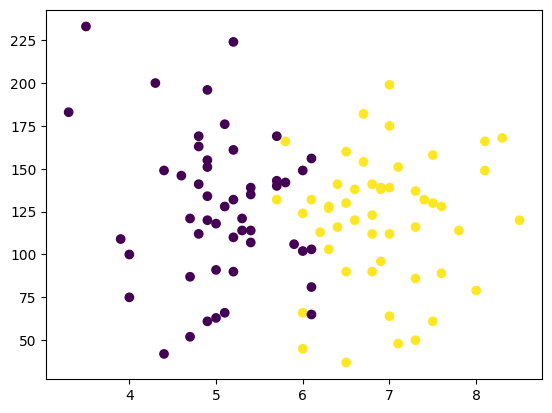

In [ ]:
plt.scatter(df['cgpa'], df['iq'], c = df['placement'])

#the scatterplot represents purple for those who did not get placement and yellow for placement.

### Extract input and output columns


In [ ]:
X = df.iloc[:,0:2]
y = df.iloc[:, -1]

In [ ]:
X.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


### Splitting the data into training and test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

In [ ]:
X_test

,cgpa,iq
78,6.1,81.0
75,4.8,169.0
96,4.4,42.0
8,6.1,156.0
60,6.9,139.0
68,4.0,75.0
21,7.1,151.0
73,4.9,61.0
74,6.7,154.0
88,4.4,149.0


### Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
X_test

array([[ 0.05208758, -1.10608491],
       [-1.09777027,  1.14531383],
       [-1.45157269, -2.1038639 ],
       [ 0.05208758,  0.81272084],
       [ 0.75969241,  0.37779153],
       [-1.80537511, -1.25958937],
       [ 0.93659362,  0.68480045],
       [-1.00931967, -1.61776645],
       [ 0.5827912 ,  0.76155268],
       [-1.45157269,  0.6336323 ]])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()

In [ ]:
#model training
clf.fit(X_train, y_train)

LogisticRegression()

### Model Evaluation

In [ ]:
y_pred = clf.predict(X_test)

#store the predicted values to y_pred variable to compare the prediction result with the expected values

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

#Here we can see that the accuracy is 90 percent

0.8

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

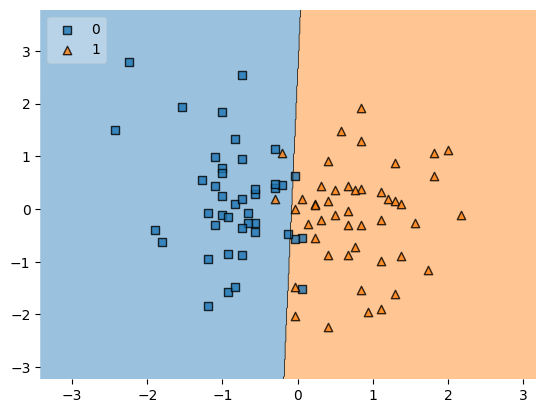

In [ ]:
plot_decision_regions(X_train, y_train.values, clf = clf , legend = 2)

### Taking the model for deployment


In [ ]:
import pickle

In [ ]:
pickle.dump(clf, open('model.pk1','wb'))

#this will export the model as a file named 'model.pk1'